In this project, I will work with US medical insurance costs data to explore Python using libraries such as pandas, seaborn and numpy

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading data from insuran.csv file 

insurance=pd.read_csv("insurance.csv")

In [115]:
# exploring data set

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [116]:
# size of the data
insurance.size

9366

In [117]:
#dimension
insurance.shape

(1338, 7)

In [6]:
# checking for a missing data
insurance.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


There is no missing value, however if there is, we can use "insurance.fillna(0)" to fill the spaces with 0 or use othetr methods such as df.fillna(method="pad") to fill with previous values or "bfill" to fill with next values or interpolate using "df.interpolate(method="linear",limit_direction ='forward') or other methods

We will analyse the data to find some useful information about the patients and their insurance information

In [25]:
def statistics(df,x):
    avg=np.mean(df[x])
    mx=np.max(df[x])
    mn=np.min(df[x])
   
    sd=np.std(df[x])
    print("The average", x, "is", np.round(avg,4))
    print("The maximum", x, "is", mx)
    print("The minimum", x, "is", mn)
    print("The standard deviation of", x, "is", np.round(sd,4))


 

In [26]:
# Finding statistics of age of the patients

statistics(insurance,"age")

The average age is 39.207
The maximum age is 64
The minimum age is 18
The standard deviation of age is 14.0447


In [27]:
# Finding statistics of charges of the patients
statistics(insurance,'charges')

The average charges is 13270.4223
The maximum charges is 63770.42801
The minimum charges is 1121.8739
The standard deviation of charges is 12105.485


In [28]:
# Finding statistics of no of children of the patients
statistics(insurance,'children')

The average children is 1.0949
The maximum children is 5
The minimum children is 0
The standard deviation of children is 1.205


In [30]:
#Function to find no of patients in each category
def categorization(df,x):
    y=df[x].value_counts()
    return y

In [31]:
#finding the sex distribution

categorization(insurance,'sex')

male      676
female    662
Name: sex, dtype: int64

We can see that there are 676 male and 662 female patients

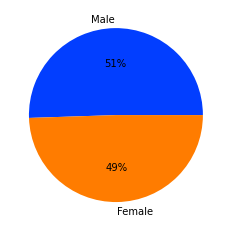

In [10]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(sex_d, labels=["Male","Female"], colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

We see that the maximum no of children is 5 and the minimum is 0

In [112]:
#finding the smoker distribution

smoker_d=categorization(insurance,'smoker')
smoker_d

no     1064
yes     274
Name: smoker, dtype: int64

There are 274 smokers and 1064 non smokers among the patients

In [105]:
region_dist=categorization(insurance,'region')
region_dist

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

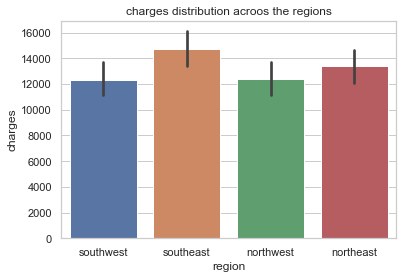

In [58]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="region", y='charges', data=insurance)
plt.title("charges distribution acroos the regions")
plt.show()

The patients are somewhat uniformly distributed across the regions except for the south east region with a little more population. We can also see in the barplot that patients in the south east region pay highest charges, then thos e of north east while those of southwest and northwest have almost equal charges.

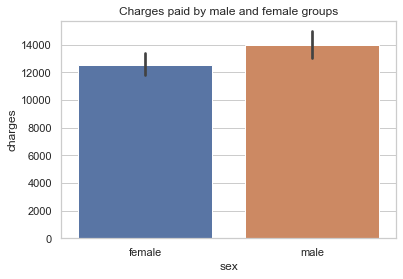

In [59]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="sex", y='charges', data=insurance)
plt.title("Charges paid by male and female groups")
plt.show()

The barplot above indicates that male patients pay higher charges than the female ones 

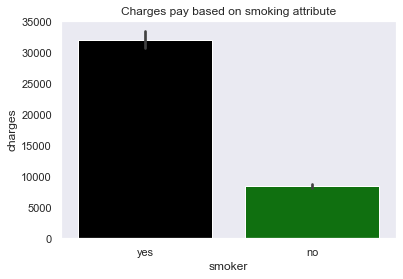

In [64]:
import seaborn as sns
sns.set_theme(style="dark")
color=['black','green']
ax = sns.barplot(x="smoker", y='charges',palette=color, data=insurance)
plt.title("Charges pay based on smoking attribute")
plt.show()

The graph indicates that smokers pay higher with a huge margin than those who do not smoke.

In [67]:
insurance.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


The above ouput shows that a smoker patient spends on average $\$ 32050.231832$ per year for insurance, while thos who do not smoke spend only  $\$8434.268298$

y=chld_chrg.iloc[:,2]
x=chld_chrg.index
sns.lineplot(x=x,y=y)
plt.title("Charges distribution by no of children")
plt.show()

We can easily observe that the charges decline as the no of children increases, this might be bias because the charges is supposed to increase with an increase in the number of children

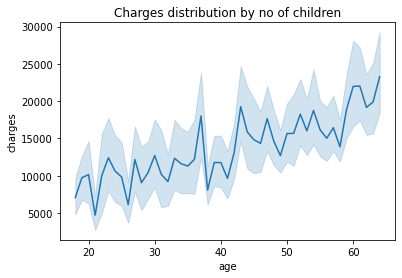

array([7.64172692e+08])

In [48]:


y=insurance.charges
x=insurance.age
sns.lineplot(x=x,y=y)
plt.title("Charges distribution by no of children")
plt.show()
np.correlate(x,y)

The graph shows an increasing trend in the charges of the patients as the patients age

In [53]:
sns.barplot?